# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)
Please note

1. Read the dataset to the python environment.

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [14]:
df=pd.read_excel("irisweek11.xls")
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Do necessary pre-processing steps.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.shape

(150, 5)

In [13]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [15]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

summarize:The data contains 150 rows and 5 columns of which 3 columns(SL, SW and PL) contains null values.()

Check and handle missing values in the dataset. Checking NaN values

In [16]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [17]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


insights:We need to deal with 19 null values. here only missing numerical  data. And on looking at the data, we are replacing the null values under SL categoris by median of the data, SW null val
    ues by mean of the data and the PL by mean of the data.

In [22]:
df["SL"] = df["SL"].fillna(df["SL"].median())
df["SW"] = df["SW"].fillna(df["SW"].mean())
df["PL"] =df["PL"].fillna(df["PL"].mean())

In [24]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40000,0.2,Iris-setosa
1,4.9,3.0,1.40000,0.2,Iris-setosa
2,5.8,3.2,1.30000,0.2,Iris-setosa
3,4.6,3.1,1.50000,0.2,Iris-setosa
4,5.0,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,Iris-virginica
146,6.3,2.5,5.00000,1.9,Iris-virginica
147,6.5,3.0,3.75625,2.0,Iris-virginica
148,6.2,3.4,5.40000,2.3,Iris-virginica


Check the outliers and handle outliers in PL using Percentiles.

Text(0.5, 1.0, 'Box plot of PL')

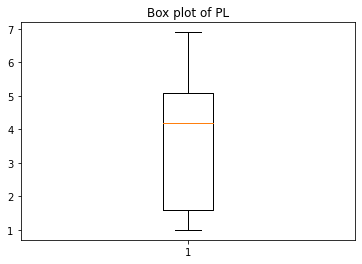

In [26]:
plt.boxplot(df['PL'])
plt.title('Box plot of PL')

3.Find out which classification model gives the best result to predict iris species.(also do random forest algorithm) Please note

In [15]:
df['PL'].median()

4.35

In [17]:
df["PL"].fillna(df['PL'].median(), inplace = True) 
df['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

Lable Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
      df[a[i]]=label_en.fit_transform(df[a[i]])

In [20]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df.shape

(150, 5)

In [22]:
# In this dataset there is 150 rows, 5 columns, 4 features and three labels in column 'Classification'
# Our problem is a Classification problem since our output predictor variable is a class.

# preparing the dataset
droping the column 'Classification', which is the target variable from x axis and droping all columns except 'Classification'from y axis

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

splitting the data in to training and testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [26]:
x_train.shape

(105, 4)

In [27]:
y_train.shape

(105,)

In [28]:
x_test.shape

(45, 4)

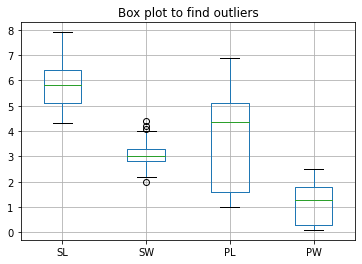

In [30]:
# Box Plot
import seaborn as sns


plt.title('Box plot to find outliers')
df.boxplot(column=['SL','SW','PL','PW'], figsize=(15,5), grid=True)

plt.show()

Model Training

In [31]:
x= df.drop(['Classification'],axis=1)
y=df['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape

(120, 4)

Logistic Rgression

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').